In [1]:
import numpy as np
import scipy.optimize as opt
import sys
import astropy.io.fits as pyfits
import math
import matplotlib.pylab as plt
import pickle
import time
from scipy.interpolate import Rbf
import katcali.io as kio

In [2]:
print  (plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'])
plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'] = 14, 1.5, 1.5
#plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'] = 10.0, 0.8, 1.5
print  (plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'])


10.0 0.8 1.5
14.0 1.5 1.5


In [3]:
print ('start @ ' + time.asctime(time.localtime(time.time())) +'#')


start @ Sun Dec  8 16:03:33 2024#


# load the standrad and high resoultion beam pattern information for 1024 channels

In [4]:
file1='beam_fit_data'
file2='beam_HiRes_fit_data'

data1=pickle.load(open(file1,'rb'))
data2=pickle.load(open(file2,'rb'))


In [5]:
data1.keys()

dict_keys(['grid_freq', 'sigma_HH', 'sigma_VV', 'Aeff_max_HH', 'Aeff_max_VV'])

In [6]:
grid_freq1=data1['grid_freq']
sigma1_HH=data1['sigma_HH']
sigma1_VV=data1['sigma_VV']
Aeff1_max_HH=data1['Aeff_max_HH']
Aeff1_max_VV=data1['Aeff_max_VV']
grid_freq1=np.array(grid_freq1)
sigma1_HH=np.array(sigma1_HH)
sigma1_VV=np.array(sigma1_VV)
Aeff1_max_HH=np.array(Aeff1_max_HH)
Aeff1_max_VV=np.array(Aeff1_max_VV)

In [7]:
data2.keys()

dict_keys(['grid_freq', 'sigma_HH', 'sigma_VV', 'Aeff_max_HH', 'Aeff_max_VV'])

In [8]:
grid_freq2=data2['grid_freq']
sigma2_HH=data2['sigma_HH']
sigma2_VV=data2['sigma_VV']
Aeff2_max_HH=data2['Aeff_max_HH']
Aeff2_max_VV=data2['Aeff_max_VV']
grid_freq2=np.array(grid_freq2)
sigma2_HH=np.array(sigma2_HH)
sigma2_VV=np.array(sigma2_VV)
Aeff2_max_HH=np.array(Aeff2_max_HH)
Aeff2_max_VV=np.array(Aeff2_max_VV)

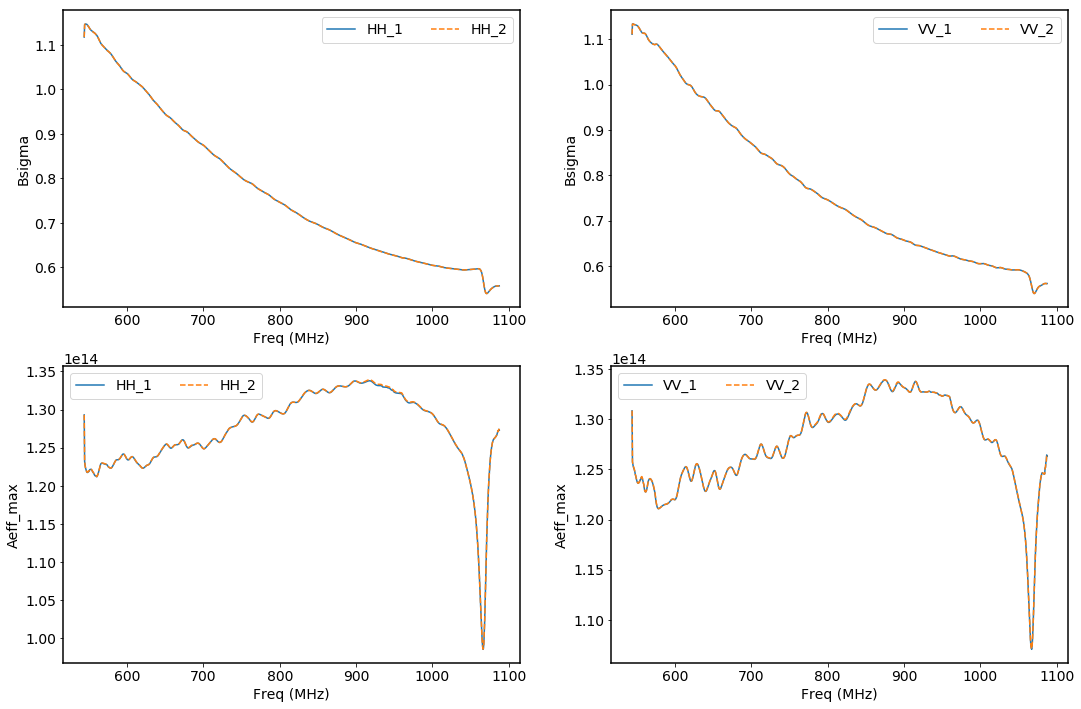

In [9]:
plt.figure(figsize=(18,12))
plt.subplot(221)
plt.plot(grid_freq1,sigma1_HH,'C0')
plt.plot(grid_freq2,sigma2_HH,'C1--')
plt.legend(['HH_1','HH_2'], ncol=2)
plt.xlabel('Freq (MHz)')
plt.ylabel('Bsigma')
plt.subplot(222)
plt.plot(grid_freq1,sigma1_VV,'C0')
plt.plot(grid_freq2,sigma2_VV,'C1--')
plt.legend(['VV_1','VV_2'], ncol=2)
plt.xlabel('Freq (MHz)')
plt.ylabel('Bsigma')
plt.subplot(223)
plt.plot(grid_freq1,Aeff1_max_HH,'C0')
plt.plot(grid_freq2,Aeff2_max_HH,'C1--')
plt.legend(['HH_1','HH_2'], ncol=2)
plt.xlabel('Freq (MHz)')
plt.ylabel('Aeff_max')
plt.subplot(224)
plt.plot(grid_freq1,Aeff1_max_VV,'C0')
plt.plot(grid_freq2,Aeff2_max_VV,'C1--')
plt.legend(['VV_1','VV_2'], ncol=2)
plt.xlabel('Freq (MHz)')
plt.ylabel('Aeff_max')
plt.show()


In [10]:
assert((grid_freq1==grid_freq2).all())
print (len(grid_freq1))

1024


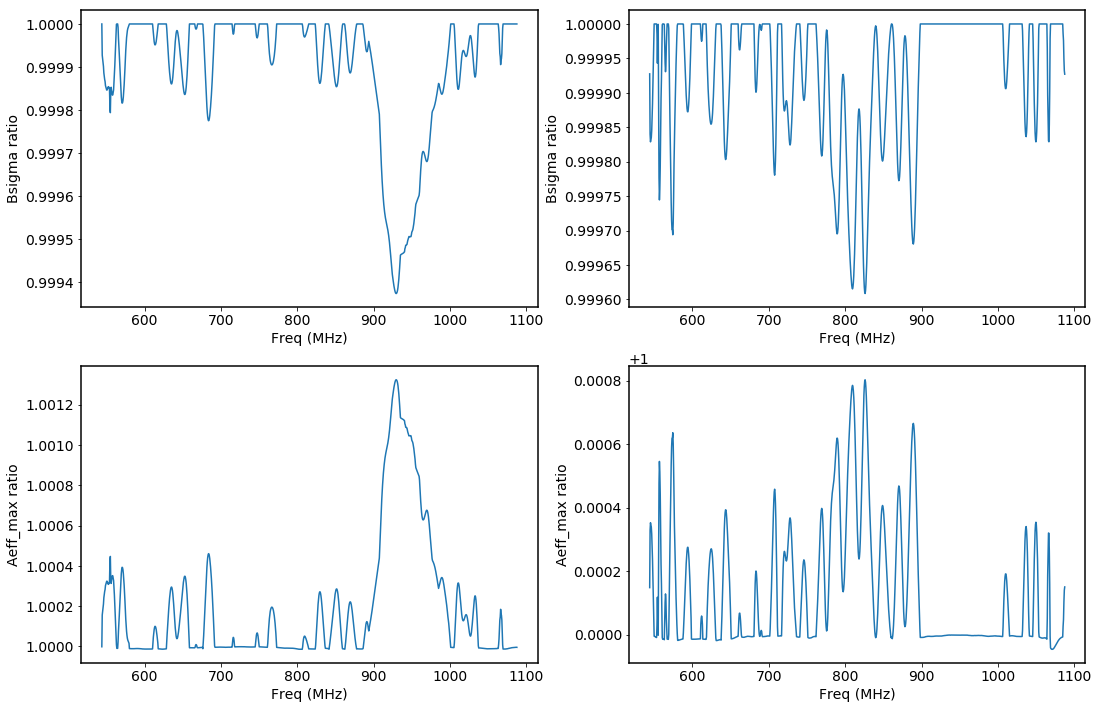

In [11]:
plt.figure(figsize=(18,12))
plt.subplot(221)
plt.plot(grid_freq1,sigma2_HH/sigma1_HH)
plt.xlabel('Freq (MHz)')
plt.ylabel('Bsigma ratio')
plt.subplot(222)
plt.plot(grid_freq1,sigma2_VV/sigma1_VV,'C0')
plt.xlabel('Freq (MHz)')
plt.ylabel('Bsigma ratio')
plt.subplot(223)
plt.plot(grid_freq1,Aeff2_max_HH/Aeff1_max_HH,'C0')
plt.xlabel('Freq (MHz)')
plt.ylabel('Aeff_max ratio')
plt.subplot(224)
plt.plot(grid_freq1,Aeff2_max_VV/Aeff1_max_VV,'C0')
plt.xlabel('Freq (MHz)')
plt.ylabel('Aeff_max ratio')
plt.show()


# load the splined result of above (1024 channels -> 4096 channels)

In [12]:
file11='beam_spline_data'
file22='beam_HiRes_spline_data'

data11=pickle.load(open(file11,'rb'))
data22=pickle.load(open(file22,'rb'))


In [13]:
data11.keys()

dict_keys(['freqs', 'sigma_HH', 'sigma_VV', 'Aeff_max_HH', 'Aeff_max_VV'])

In [14]:
freqs_f1=data11['freqs']
sigma_HH_f1=data11['sigma_HH']
sigma_VV_f1=data11['sigma_VV']
Aeff_max_HH_f1=data11['Aeff_max_HH']
Aeff_max_VV_f1=data11['Aeff_max_VV']


In [15]:
data22.keys()

dict_keys(['freqs', 'sigma_HH', 'sigma_VV', 'Aeff_max_HH', 'Aeff_max_VV'])

In [16]:
freqs_f2=data22['freqs']
sigma_HH_f2=data22['sigma_HH']
sigma_VV_f2=data22['sigma_VV']
Aeff_max_HH_f2=data22['Aeff_max_HH']
Aeff_max_VV_f2=data22['Aeff_max_VV']


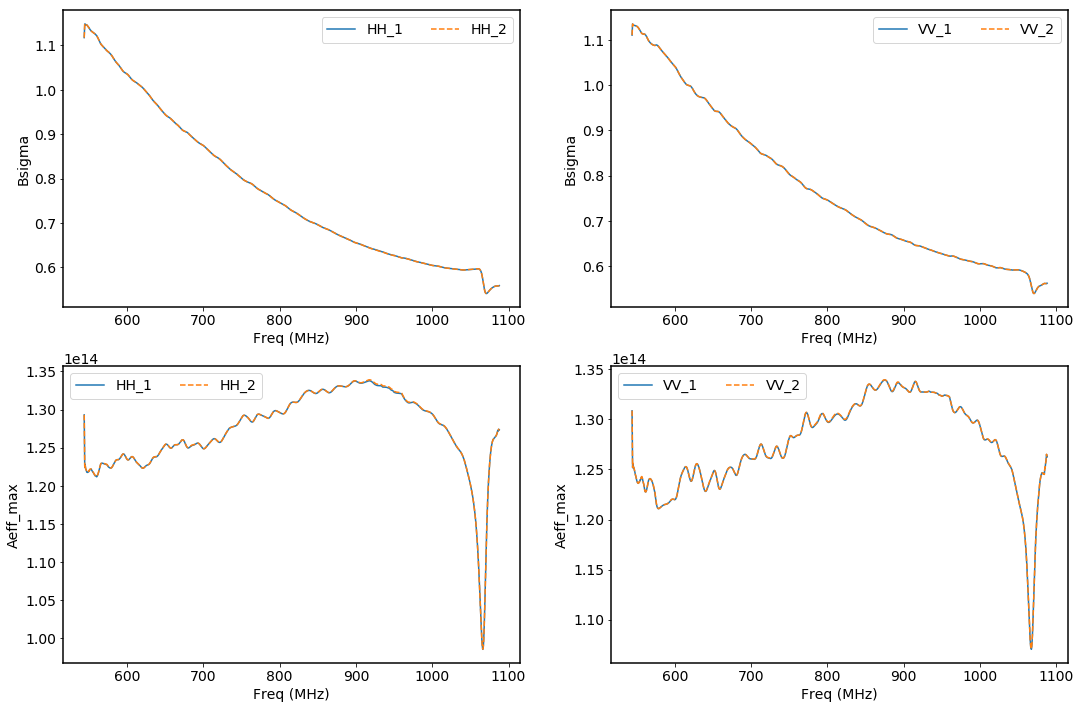

In [17]:
plt.figure(figsize=(18,12))
plt.subplot(221)
plt.plot(freqs_f1,sigma_HH_f1,'C0')
plt.plot(freqs_f2,sigma_HH_f2,'C1--')
plt.legend(['HH_1','HH_2'], ncol=2)
plt.xlabel('Freq (MHz)')
plt.ylabel('Bsigma')
plt.subplot(222)
plt.plot(freqs_f1,sigma_VV_f1,'C0')
plt.plot(freqs_f2,sigma_VV_f2,'C1--')
plt.legend(['VV_1','VV_2'], ncol=2)
plt.xlabel('Freq (MHz)')
plt.ylabel('Bsigma')
plt.subplot(223)
plt.plot(freqs_f1,Aeff_max_HH_f1,'C0')
plt.plot(freqs_f2,Aeff_max_HH_f2,'C1--')
plt.legend(['HH_1','HH_2'], ncol=2)
plt.xlabel('Freq (MHz)')
plt.ylabel('Aeff_max')
plt.subplot(224)
plt.plot(freqs_f1,Aeff_max_VV_f1,'C0')
plt.plot(freqs_f2,Aeff_max_VV_f2,'C1--')
plt.legend(['VV_1','VV_2'], ncol=2)
plt.xlabel('Freq (MHz)')
plt.ylabel('Aeff_max')
plt.show()


In [18]:
assert((freqs_f1==freqs_f2).all())
print (len(freqs_f1))

4096


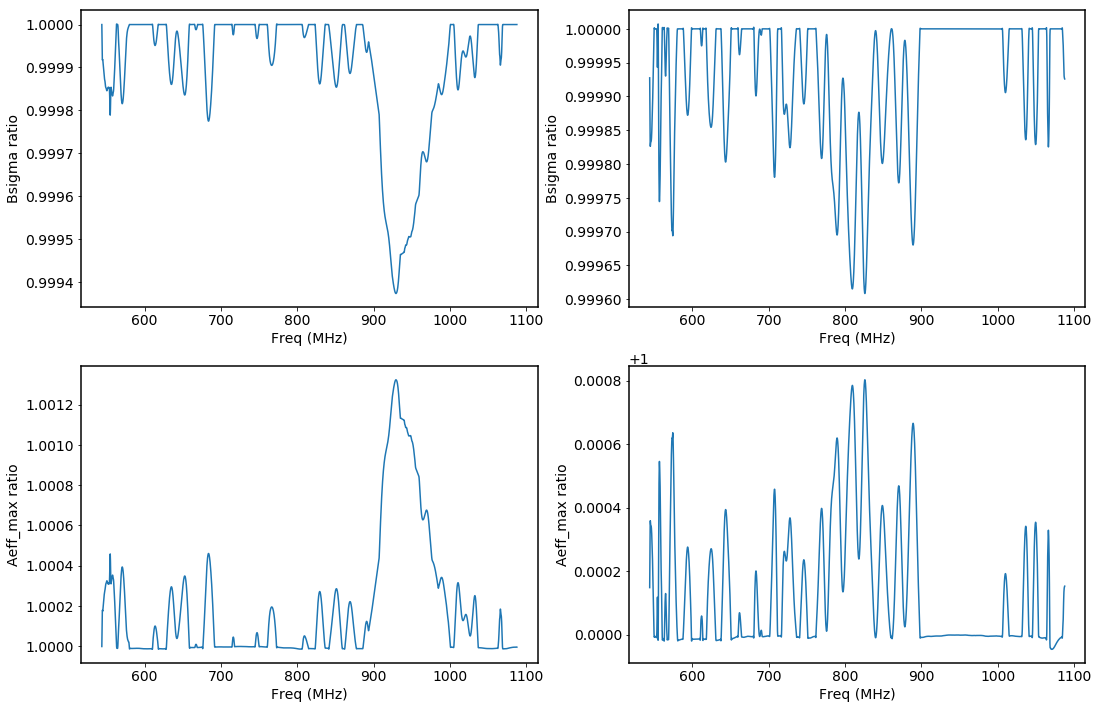

In [19]:
plt.figure(figsize=(18,12))
plt.subplot(221)
plt.plot(freqs_f1,sigma_HH_f2/sigma_HH_f1)
plt.xlabel('Freq (MHz)')
plt.ylabel('Bsigma ratio')
plt.subplot(222)
plt.plot(freqs_f1,sigma_VV_f2/sigma_VV_f1)
plt.xlabel('Freq (MHz)')
plt.ylabel('Bsigma ratio')
plt.subplot(223)
plt.plot(freqs_f1,Aeff_max_HH_f2/Aeff_max_HH_f1)
plt.xlabel('Freq (MHz)')
plt.ylabel('Aeff_max ratio')
plt.subplot(224)
plt.plot(freqs_f1,Aeff_max_VV_f2/Aeff_max_VV_f1)
plt.xlabel('Freq (MHz)')
plt.ylabel('Aeff_max ratio')
plt.show()

In [20]:
print ('end @ ' + time.asctime(time.localtime(time.time())) +'#')

end @ Sun Dec  8 16:03:40 2024#
